In [6]:
import torch
import matplotlib.pyplot as plt

from sigmoid_model import SigmoidModel

train_x = torch.tensor([[0, 1], [0, 0], [1, 0], [1,1]], dtype=torch.float).reshape(-1,2)
train_y = torch.tensor([[1], [1], [1], [0]], dtype=torch.float)

In [18]:
model = SigmoidModel(
        W = torch.rand((2,1), requires_grad=True),
        b = torch.rand((1,1), requires_grad=True))

optimizer = torch.optim.SGD([model.b, model.W], lr=0.1)
for epoch in range(250_000):
	model.loss(train_x, train_y).backward()
	optimizer.step()
	optimizer.zero_grad()

print("W = %s, b = %s, loss = %s" %(model.W, model.b, model.loss(train_x, train_y)))

dict_items([('W', tensor([[0.3703],
        [0.5346]], requires_grad=True)), ('b', tensor([[0.9298]], requires_grad=True))])
W = tensor([[-13.9010],
        [-13.9010]], requires_grad=True), b = tensor([[21.0182]], requires_grad=True), loss = tensor(0.0007, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)


C:\Users\Eirik\AppData\Local\Programs\Python\Python38\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([xs, ys, zs, np.ones_like(xs)])


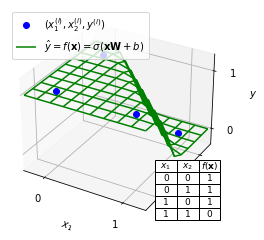

In [29]:
import numpy as np

xt =train_x.t()[0]
yt =train_x.t()[1]

fig = plt.figure("Logistic regression: the logical OR operator")

plot1 = fig.add_subplot(111, projection='3d')

plot1_f = plot1.plot_wireframe(np.array([[]]), np.array([[]]), np.array([[]]), color="green", label="$\\hat y=f(\\mathbf{x})=\\sigma(\\mathbf{xW}+b)$")

plot1.plot(xt.squeeze(), yt.squeeze(), train_y[:, 0].squeeze(), 'o', label="$(x_1^{(i)}, x_2^{(i)},y^{(i)})$", color="blue")

plot1_info = fig.text(0.01, 0.02, "")

plot1.set_xlabel("$x_1$")
plot1.set_ylabel("$x_2$")
plot1.set_zlabel("$y$")
plot1.legend(loc="upper left")
plot1.set_xticks([0, 1])
plot1.set_yticks([0, 1])
plot1.set_zticks([0, 1])
plot1.set_xlim(-0.25, 1.25)
plot1.set_ylim(-0.25, 1.25)
plot1.set_zlim(-0.25, 1.25)

table = plt.table(cellText=[[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 0]],
                  colWidths=[0.1] * 3,
                  colLabels=["$x_1$", "$x_2$", "$f(\\mathbf{x})$"],
                  cellLoc="center",
                  loc="lower right")


plot1_f.remove()
x1_grid, x2_grid = np.meshgrid(np.linspace(-0.25, 1.25, 10), np.linspace(-0.25, 1.25, 10))
y_grid = np.empty([10, 10])
for i in range(0, x1_grid.shape[0]):
    for j in range(0, x1_grid.shape[1]):
        y_grid[i, j] = model.f(torch.tensor([[(x1_grid[i, j]),  (x2_grid[i, j])]], dtype=torch.float))
plot1_f = plot1.plot_wireframe(x1_grid, x2_grid, y_grid, color="green")


fig.canvas.draw()

plt.show()